CORE - CLOSE AND SPARSE EPYC FLOAT 

In [1]:
import numpy as np
import csv
from matplotlib import pyplot as plt

In [2]:
with open('../core_scalability/THIN/CLOSE/dblis.csv', 'r') as f:
    reader = csv.reader(f)
    data_blis = list(reader)

with open('../core_scalability/THIN/CLOSE/doblas.csv', 'r') as f:
    reader = csv.reader(f)
    data_oblas = list(reader)

with open('../core_scalability/THIN/CLOSE/dmkl.csv', 'r') as f:
    reader = csv.reader(f)
    data_mkl = list(reader)


with open('../core_scalability/THIN/SPREAD/dblis.csv', 'r') as f:
    reader = csv.reader(f)
    s_data_blis = list(reader)

with open('../core_scalability/THIN/SPREAD/doblas.csv', 'r') as f:
    reader = csv.reader(f)
    s_data_oblas = list(reader)

with open('../core_scalability/THIN/SPREAD/dmkl.csv', 'r') as f:
    reader = csv.reader(f)
    s_data_mkl = list(reader)




In [3]:
def PLOT (data): 
    data_array = np.array(data[1:], dtype=float)

    data_per_dimension = np.empty((24, 5, 4))
    j = 0
    for i in range(0,24):
            data_per_dimension[i]=  data_array[j:j+5,:]
            j = j + 5

    method = np.empty((24, 4))
    for i in range(0,24):
            method[i]=  np.mean(data_per_dimension[i], axis=0)

    return method

In [4]:
mkl=PLOT(data_mkl)
oblas=PLOT(data_oblas)
blis=PLOT(data_blis)

s_mkl=PLOT(s_data_mkl)
s_oblas=PLOT(s_data_oblas)
s_blis=PLOT(s_data_blis)

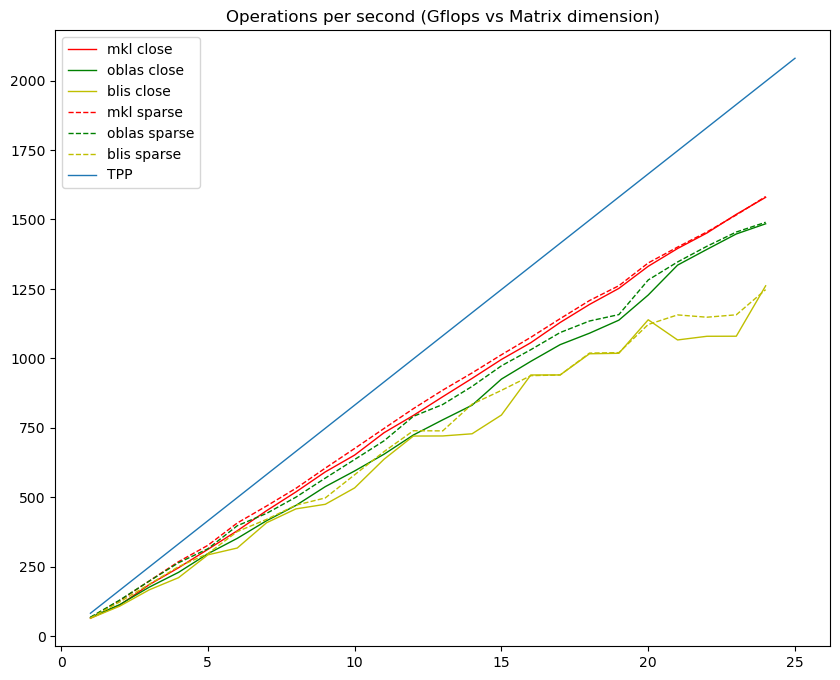

In [6]:
plt.figure(figsize=(10,8))
plt.plot(range(1,25,1), mkl[:,3], color='r', label='mkl close', linewidth=1)
#plt.scatter(range(1,129,1), mkl[:,3], color='r')

plt.plot(range(1,25,1), oblas[:,3], color='g', label='oblas close', linewidth=1)
#plt.scatter(range(1,129,1), oblas[:,3], color='g')

plt.plot(range(1,25,1), blis[:,3], color='y', label='blis close', linewidth=1)
#plt.scatter(range(1,129,1), blis[:,3], color='y')


plt.plot(range(1,25,1), s_mkl[:,3], color='r', label='mkl spread', linewidth=1, linestyle='dashed')
#plt.scatter(range(1,129,1), s_mkl[:,3], color='c')

plt.plot(range(1,25,1), s_oblas[:,3], color='g', label='oblas spread', linewidth=1, linestyle='dashed')
#plt.scatter(range(1,129,1), s_oblas[:,3], color='m')

plt.plot(range(1,25,1), s_blis[:,3], color='y', label='blis spread', linewidth=1, linestyle='dashed')
#plt.scatter(range(1,129,1), s_blis[:,3], color='b')

x = np.linspace(1, 25, 128)
y = 83.2*x
plt.plot(x, y, label='TPP', linewidth=1)

plt.title("Operations per second (Gflops vs Matrix dimension)")
plt.legend()
plt.show()
